<a href="https://colab.research.google.com/github/COLONAYUSH/A-HTML-only-site/blob/master/Base_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [2]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import pandas as pd
# import statsmodels.api as sm
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics.pairwise import haversine_distances
!pip install haversine
import haversine as hs
from math import radians
# from collections import Counter as counter
# import folium
import random
import math
from sklearn.datasets.samples_generator import make_blobs 
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn.datasets as dt


### Reading the dataset

In [3]:
data = pd.read_csv("/content/data_update.csv")
X = data.iloc[:,:-1]
dataset_new = data[['latitude', 
                       'lontitude']].values
print(X)

       latitude   lontitude  Workload  Latency  Max_Distance  Capacity
0     30.903041  121.922883         4  0.02203         6.609       NaN
1     30.956183  121.908274         5  0.02726         8.178       NaN
2     30.988441  121.874860         7  0.02364         7.092       NaN
3     30.988441  121.874860         4  0.02150         6.450       NaN
4     30.933365  121.873737         4  0.01963         5.889       NaN
...         ...         ...       ...      ...           ...       ...
6182  30.893975  121.016922         9  0.02295         6.885       NaN
6183  30.893975  121.016922         4  0.02039         6.117       NaN
6184  30.893975  121.016922         1  0.01309         3.927       NaN
6185  30.930023  121.011969         5  0.01885         5.655       NaN
6186  31.099755  121.009542         2  0.01773         5.319       NaN

[6187 rows x 6 columns]


### Data Visualization 

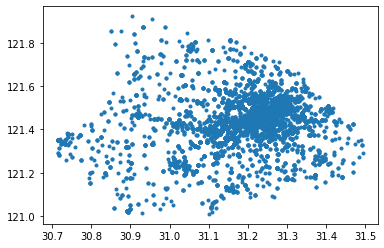

In [4]:
plt.scatter(data['latitude'], data['lontitude'], marker = '.') #setting up for visualization
plt.show()

In [5]:
kmeans = KMeans(7)
kmeans.fit(dataset_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
centroid = kmeans.cluster_centers_
print(centroid)

[[ 31.21115496 121.489909  ]
 [ 31.05958333 121.1737396 ]
 [ 31.30618287 121.5141808 ]
 [ 31.08589079 121.68232575]
 [ 30.84684199 121.36742555]
 [ 31.30835404 121.31441284]
 [ 31.13044446 121.37518205]]


### Elbow Method

Text(0, 0.5, 'WCSS')

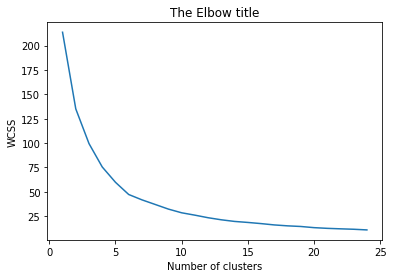

In [7]:
  wcss=[]   #Method to calculate the number of clustering points
  for i in range(1,25):
    kmeans = KMeans(i)
    kmeans.fit(dataset_new)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

  number_clusters = range(1,25) #getting the square matrix for display
  plt.plot(number_clusters,wcss)
  plt.title('The Elbow title')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')

### Silhouette Score

For n_clusters=2, Silhouette Coefficient = 0.39046281460998034
For n_clusters=3, Silhouette Coefficient = 0.3520719756400945
For n_clusters=4, Silhouette Coefficient = 0.37810707863116405
For n_clusters=5, Silhouette Coefficient = 0.3993031075135395
For n_clusters=6, Silhouette Coefficient = 0.4207216412075339
For n_clusters=7, Silhouette Coefficient = 0.3690333388757334
For n_clusters=8, Silhouette Coefficient = 0.38733952096034324
For n_clusters=9, Silhouette Coefficient = 0.38441585915007254
For n_clusters=10, Silhouette Coefficient = 0.3980472327425441
For n_clusters=11, Silhouette Coefficient = 0.4032372466244869
For n_clusters=12, Silhouette Coefficient = 0.4099753858471468
For n_clusters=13, Silhouette Coefficient = 0.4094985412034181
For n_clusters=14, Silhouette Coefficient = 0.3952329498512078
For n_clusters=15, Silhouette Coefficient = 0.3908615688465906
For n_clusters=16, Silhouette Coefficient = 0.3920955972643688
For n_clusters=17, Silhouette Coefficient = 0.3966347794961

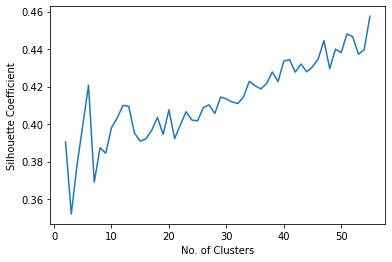

In [8]:
limit = int((dataset_new.shape[0]//2)**0.5)
k_clusters = []
sil_coeffecients = []

# determing number of clusters
# using silhouette score method
for k in range(2, limit+1):
    kmeans = KMeans(k).fit(dataset_new)
    label = kmeans.labels_
    sil_coeff = silhouette_score(dataset_new, label)
    print("For n_clusters={}, Silhouette Coefficient = {}".format(k, sil_coeff))
    sil_coeffecients.append(sil_coeff)
    k_clusters.append(k)

plt.plot(k_clusters, sil_coeffecients)
plt.ylabel('Silhouette Coefficient'), plt.xlabel('No. of Clusters')
plt.show()

### Distances

In [9]:
#Euclidian Distance between two d-dimensional points
def eucldist(p0,p1):
    dist = 0.0
    for i in range(0,len(p0)):
        dist += (p0[i] - p1[i])**2
    return math.sqrt(dist)

#haversine_distances
def haversine_distance(p0,p1):
    dist_h=0.0
    for i in range(0,len(p0)):
      p0_rads= [radians(_) for _ in p0]
      p1_rads= [radians(_) for _ in p1]
      dist_h = hs.haversine(p0_rads,p1_rads)
    return dist_h*6371

##K-Means Algorithm

In [10]:


def kmeans(k,dataset_new):

    # d - Dimensionality of Datapoints
    d = len(dataset_new[0]) 

    #Limit our iterations
    Max_Iterations = 1000
    i = 0

    cluster = [0] * len(dataset_new)
    prev_cluster = [-1] * len(dataset_new)

    #Randomly Choose Centers for the Clusters
    cluster_centers = []
    for i in range(0,k):
        new_cluster = []
        #for i in range(0,d):
        #    new_cluster += [random.randint(0,10)]
        cluster_centers.append(random.choice(dataset_new))

        force_recalculation = False

    while (cluster != prev_cluster) or (i > Max_Iterations) or (force_recalculation) :

        prev_cluster = list(cluster)
        # force_recalculation = False
        i += 1

        #Update Point's Cluster Allegiance
        for p in range(0,len(dataset_new)):
            min_dist = 0.1
            #Check min_distance against all centers
            for c in range(0,len(cluster_centers)):

                # dist = haversine_distance(dataset_new[p],cluster_centers[c])
                dist_h = eucldist(dataset_new[p],cluster_centers[c])

                if (dist_h < min_dist):
                    min_dist = dist_h
                    print(min_dist)  
                    cluster[p] = c   # Reassign Point to new Cluster


        #Update Cluster's Position
        for k in range(0,len(cluster_centers)):
            new_center = [0] * d
            members = 0
            for p in range(0,len(dataset_new)):
                if (cluster[p] == k): #If this point belongs to the cluster
                    for j in range(0,d):
                        new_center[j] += dataset_new[p][j]
                    members += 1

            for j in range(0,d):
                if members != 0:
                    new_center[j] = new_center[j] / float(members) 

                #This means that our initial random assignment was poorly chosen
                #Change it to a new datapoint to actually force k clusters
                else: 
                    new_center = random.choice(dataset_new)
                    # force_recalculation = True
                    # print("Forced Recalculation...")


            cluster_centers[k] = tuple(new_center)


    # print("======== Results ========")
    # print("Iterations",i)
    print("Assignments", cluster)
    for i in set(set(cluster)):
      print(f'{i}: {cluster.count(i)}')
    return cluster_centers


###TESTING THE PROGRAM#

Streaming output truncated to the last 5000 lines.
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.08452650651831087
0.021800712438567894
0.0845

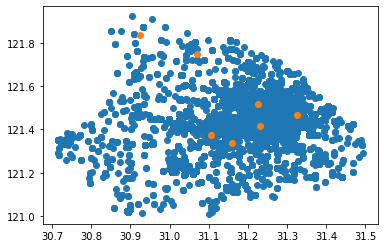

In [11]:
if __name__ == "__main__":
    #2D - Datapoints List of n d-dimensional vectors. (For this example I already set up 2D Tuples)
    #Feel free to change to whatever size tuples you want...

  k = 7 # K - Number of Clusters
  lst = list(kmeans(k,dataset_new))
  print(lst)
  plt.scatter(*zip(*dataset_new))
  plt.scatter(*zip(*lst))
  plt.show()
  # fre = counter(lst)


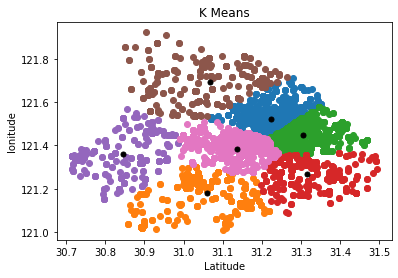

In [12]:
model = KMeans(n_clusters=7)  
pred = model.fit_predict(dataset_new)

for i in np.unique(model.labels_):
    plt.scatter(dataset_new[pred==i, 0],
                dataset_new[pred==i, 1],
                cmap = 'hsv')
      
plt.scatter(model.cluster_centers_[:, 0], 
            model.cluster_centers_[:, 1], 
            s = 25,  
            c = 'black')
  
plt.title('K Means')
plt.xlabel('Latitude')
plt.ylabel('lonitude')
plt.show()